In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Charger votre fichier (assurez-vous de l'avoir importé dans Colab)
df = pd.read_csv('Movies_dataset.csv')

# Aperçu des données
print(df.head())

    id            original_title original_language                genre  \
0  278  The Shawshank Redemption                en         Drama, Crime   
1  238             The Godfather                en         Drama, Crime   
2  240     The Godfather Part II                en         Drama, Crime   
3  424          Schindler's List                en  Drama, History, War   
4  389              12 Angry Men                en                Drama   

                                            overview  popularity  vote_count  \
0  Imprisoned in the 1940s for the double murder ...     36.1467       29384   
1  Spanning the years 1945 to 1955, a chronicle o...     37.3341       22174   
2  In the continuing saga of the Corleone crime f...     14.6729       13404   
3  The true story of how businessman Oskar Schind...     13.6783       16923   
4  The defense and the prosecution have rested an...     10.6929        9589   

   vote_average release_date  
0         8.714   1994-09-23  
1     

In [5]:
# On sélectionne les colonnes numériques pour la segmentation
# Adaptez les noms des colonnes selon votre fichier CSV
features = ['popularity', 'vote_count', 'vote_average']
data_segmentation = df[features].dropna() # On supprime les lignes vides

# Normalisation des données (étape cruciale pour le clustering)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_segmentation)

In [6]:
# Application de l'algorithme K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Ajout des clusters au tableau d'origine
data_segmentation['Segment'] = clusters

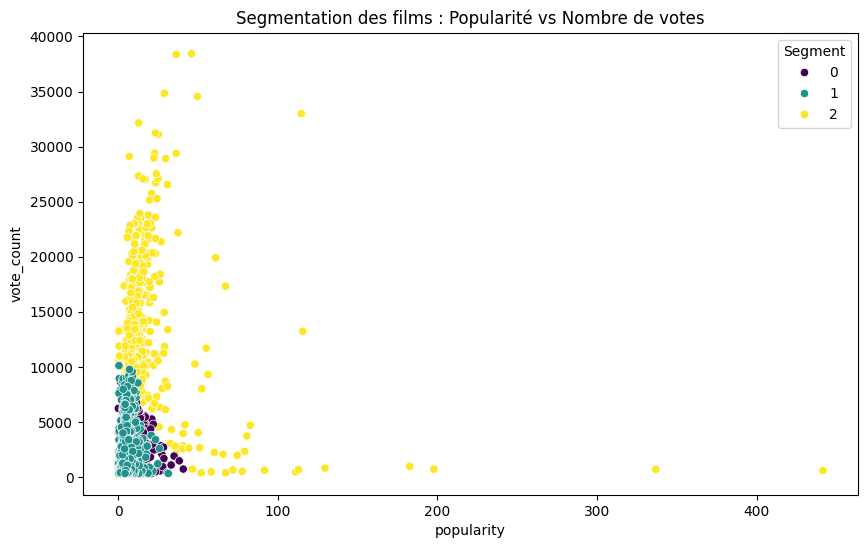

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_segmentation, x='popularity', y='vote_count', hue='Segment', palette='viridis')
plt.title('Segmentation des films : Popularité vs Nombre de votes')
plt.show()